In [75]:
import numpy as np

#Create table
from prettytable import PrettyTable

#Read csv
import pandas as pd

#Curva ROC e punteggio AUC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import train_test_split  
import seaborn as sns  


In [86]:
##Dati generati dai modelli con assunzione sul target (<4 = bad)
data_naive = pd.read_csv("./csv/result_assumption/testing_assumption_naivebayes.csv")
data_our_nb = pd.read_csv("./csv/result_assumption/testing_assumption_netbayesain.csv")
data_r = pd.read_csv("./csv/result_assumption/testing_assumption_r.csv")
#Dati testing con assunzione (<4 = bad)
data_testing_assumption = pd.read_csv("./csv/testing_assumption.csv")

##Dati generati dai modelli con input il risultato target di sentimental analysis
data_naive_sentimental = pd.read_csv("./csv/result_sentimental/testing_sentimental_naivebayes.csv")
data_our_nb_sentimental = pd.read_csv("./csv/result_sentimental/testing_sentimental_netbayesain.csv")
data_r_sentimental = pd.read_csv("./csv/result_sentimental/testing_sentimental_r.csv")
#Dati testing con input il risultato target di sentimental analysis
data_testing_sentimental = pd.read_csv("./csv/testing_sentimental.csv")


##Colonne target dei file csv con assunzione sul target (<4 = bad)
column_naive_assumption = data_naive['target'].values
column_our_nb_assumption = data_our_nb['target'].values
column_r_assumption = data_r['target'].values
column_testing_assumption = data_testing_assumption['target'].values

##Colonne target dei file con input il risultato target di sentimental analysis
column_naive_sentimental = data_naive_sentimental['target'].values
column_our_nb_sentimental = data_our_nb_sentimental['target'].values
column_r_sentimental = data_r_sentimental['target'].values
column_testing_sentimental = data_testing_sentimental['target'].values


#Colonna delle probabilita con assunzione
column_probs_naive = data_naive['prob'].values
column_probs_our_nb = data_our_nb['prob'].values
column_probs_target_r = data_r['prob'].values

#Colonna delle probabilità con sentimental analysis 
column_probs_naive_sentimental = data_naive_sentimental['prob'].values
column_probs_our_nb_sentimental = data_our_nb_sentimental['prob'].values
column_probs_target_r_sentimental = data_r_sentimental['prob'].values


binary_naive_assumption = []
binary_our_nb_assumption = []
binary_r_assumption = []
binary_testing_assumption = []

binary_naive_sentimental = []
binary_our_nb_sentimental = []
binary_r_sentimental = []
binary_testing_sentimental = []

for i in range(len(column_testing_assumption)):
    
    if column_naive_assumption[i] == "good":
        binary_naive_assumption.append(1)
    else:
        binary_naive_assumption.append(0)
    
    if column_our_nb_assumption[i] == "good":
        binary_our_nb_assumption.append(1)
    else:
        binary_our_nb_assumption.append(0)

    if column_r_assumption[i] == "good":
        binary_r_assumption.append(1)
    else:
        binary_r_assumption.append(0)

    if column_testing_assumption[i] == "good":
        binary_testing_assumption.append(1)
    else:
        binary_testing_assumption.append(0)

for i in range(len(column_testing_sentimental)):
    
    if column_naive_sentimental[i] == "good":
        binary_naive_sentimental.append(1)
    else:
        binary_naive_sentimental.append(0)
    
    if column_our_nb_sentimental[i] == "good":
        binary_our_nb_sentimental.append(1)
    else:
        binary_our_nb_sentimental.append(0)

    if column_r_sentimental[i] == "good":
        binary_r_sentimental.append(1)
    else:
        binary_r_sentimental.append(0)

    if column_testing_sentimental[i] == "good":
        binary_testing_sentimental.append(1)
    else:
        binary_testing_sentimental.append(0)


In [77]:
##Funzione per generare la matrice di confusione date le colonne target

def create_confusion_matrix(predicted, testing):
    
    true_positive = 0
    false_negative = 0
    false_positive = 0
    true_negative = 0
    i = 0
    
    for i in range(len(predicted)):
        
        if testing[i] == "good" and predicted[i] == "good":
            true_positive += 1
            
        elif testing[i] == "good" and predicted[i] == "bad":
            false_negative += 1
            
        elif testing[i] == "bad" and predicted[i] == "good":
            false_positive += 1
            
        elif testing[i] == "bad" and predicted[i] == "bad":
            true_negative += 1

    #print(true_positive)
    #print(false_negative)
    #print(false_positive)
    #print(true_negative)
    
    return true_positive, false_negative, false_positive, true_negative

In [78]:
##Funzione per calcolare accuracy, precision, recall, f-measure, specificity e roc curve 

def performance_unit(confusion_matrix, binary):
    
    true_positive = confusion_matrix[0]
    false_negative = confusion_matrix[1]
    false_positive = confusion_matrix[2]
    true_negative = confusion_matrix[3]
    
    #print(true_positive)
    #print(false_negative)
    #print(false_positive)
    #print(true_negative)
    
    accuracy = (float)(true_positive + true_negative) / (float)(true_positive + false_negative + false_positive + true_negative)
    precision = (float)(true_positive) / (float)(true_positive + false_positive)
    recall = (float)(true_positive) / (float)(true_positive + false_negative)
    fmeasure = (float)(2 * precision * recall) / (float)(precision + recall)
    specificity = (float)(true_negative) / (float)(true_negative + false_positive)
    FP_rate = (float)(false_positive) / (float)(true_negative + false_positive)
    
    print("Accuracy = " + str(accuracy))
    print("Precision = " + str(precision))
    print("Recall = " + str(recall))
    print("F-measure = " + str(fmeasure))
    print("Specificity = " + str(specificity))
    

In [79]:
##Funzione per grafico curva ROC ed AUC

def plot_roc_curve(fpr, tpr):  
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


(9300, 746, 398, 3717)
Accuracy = 0.919214744721
Precision = 0.958960610435
Recall = 0.925741588692
F-measure = 0.94205834684
Specificity = 0.903280680437
AUC = 0.97


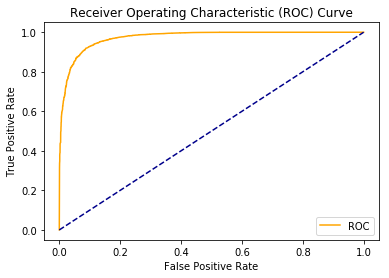

In [90]:
cm = create_confusion_matrix(column_naive_assumption, column_testing_assumption)
print(cm)
performance_unit(cm, binary_naive_assumption)

auc = roc_auc_score(binary_testing_assumption, column_probs_naive)  
print('AUC = %.2f' % auc)

fpr, tpr, thresholds = roc_curve(binary_testing_assumption, column_probs_naive)

plot_roc_curve(fpr, tpr)

(9190, 856, 537, 3578)
Accuracy = 0.901631240732
Precision = 0.944792844659
Recall = 0.914791956998
F-measure = 0.929550397006
Specificity = 0.8695018226
AUC = 0.94


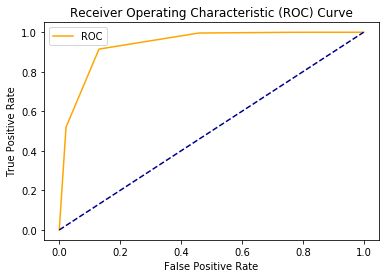

In [91]:
cm = create_confusion_matrix(column_our_nb_assumption, column_testing_assumption)
print(cm)
performance_unit(cm, binary_our_nb_assumption)

auc = roc_auc_score(binary_testing_assumption, column_probs_our_nb)  
print('AUC = %.2f' % auc)

fpr, tpr, thresholds = roc_curve(binary_testing_assumption, column_probs_our_nb)

plot_roc_curve(fpr, tpr)

(9475, 571, 631, 3484)
Accuracy = 0.915118988772
Precision = 0.937561844449
Recall = 0.943161457296
F-measure = 0.940353314807
Specificity = 0.846658566221
AUC = 0.92


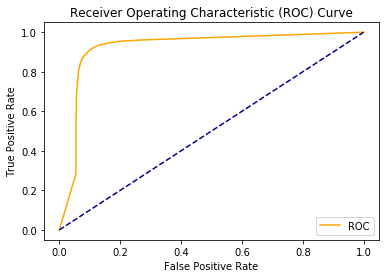

In [93]:
cm = create_confusion_matrix(column_r_assumption, column_testing_assumption)
print(cm)
performance_unit(cm, binary_r_assumption)

auc = roc_auc_score(binary_testing_assumption, column_probs_target_r)  
print('AUC = %.2f' % auc)  

fpr, tpr, thresholds = roc_curve(binary_testing_assumption, column_probs_target_r)  

plot_roc_curve(fpr, tpr)  

(8069, 3855, 77, 980)
Accuracy = 0.697095755335
Precision = 0.990547507979
Recall = 0.676702448843
F-measure = 0.80408570005
Specificity = 0.927152317881
AUC = 0.91


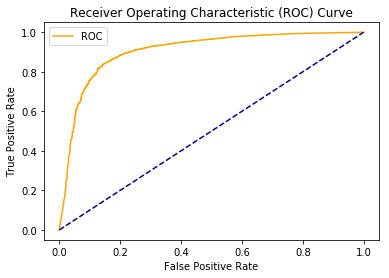

In [94]:
cm = create_confusion_matrix(column_naive_sentimental, column_testing_sentimental)
print(cm)
performance_unit(cm, binary_naive_sentimental)

auc = roc_auc_score(binary_testing_sentimental, column_probs_naive_sentimental)  
print('AUC = %.2f' % auc)  

fpr, tpr, thresholds = roc_curve(binary_testing_sentimental, column_probs_naive_sentimental)  

plot_roc_curve(fpr, tpr)

(10663, 1261, 266, 791)
Accuracy = 0.882366535706
Precision = 0.975661085186
Recall = 0.894246897014
F-measure = 0.933181639172
Specificity = 0.748344370861
AUC = 0.89


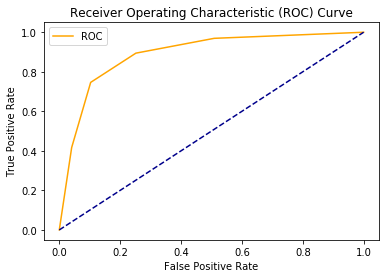

In [95]:
cm = create_confusion_matrix(column_our_nb_sentimental, column_testing_sentimental)
print(cm)
performance_unit(cm, binary_our_nb_assumption)

auc = roc_auc_score(binary_testing_sentimental, column_probs_our_nb_sentimental)  
print('AUC = %.2f' % auc)  

fpr, tpr, thresholds = roc_curve(binary_testing_sentimental, column_probs_our_nb_sentimental)  

plot_roc_curve(fpr, tpr)

(9525, 2399, 186, 871)
Accuracy = 0.800862799476
Precision = 0.980846462774
Recall = 0.798809124455
F-measure = 0.880517679686
Specificity = 0.824030274361
AUC = 0.82


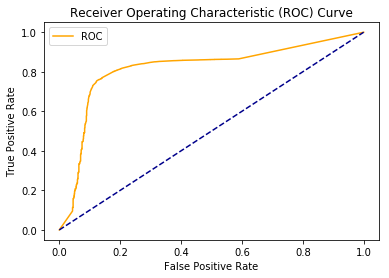

In [96]:
cm = create_confusion_matrix(column_r_sentimental, column_testing_sentimental)
print(cm)
performance_unit(cm, binary_r_sentimental)

auc = roc_auc_score(binary_testing_sentimental, column_probs_target_r_sentimental)  
print('AUC = %.2f' % auc)

fpr, tpr, thresholds = roc_curve(binary_testing_sentimental, column_probs_target_r_sentimental)  

plot_roc_curve(fpr, tpr)